<a href="https://colab.research.google.com/github/harrymkwn/Deep_Learning/blob/master/DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.colors
from tqdm import tqdm_notebook 

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

#Preparind Data

In [0]:
data,labels = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0)

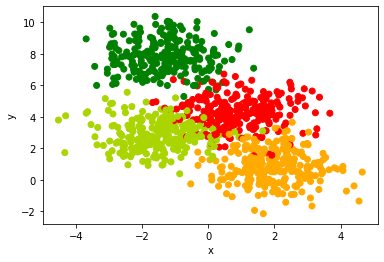

In [4]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

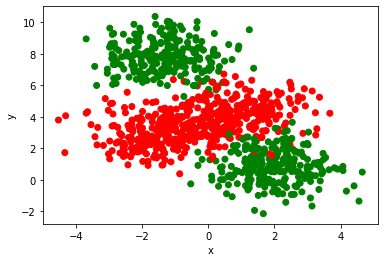

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x_train , x_test , y_train , y_test = train_test_split(data,labels,test_size=.1,stratify=labels,random_state=1)

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(900, 2) (100, 2) (900,) (100,)


#Deep Neural Network 

In [0]:
class DNN:
  def __init__(self,n_inputs,hidden_sizes):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.w = {}
    self.b = {}
    for i in range(self.nh + 1):
      self.w[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      self.b[i+1] = np.zeros((1,self.sizes[i+1]))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def forwardpass(self,x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1,-1)
    for i in range(self.nh +1):
      self.A[i+1] = np.matmul(self.H[i] , self.w[i+1]) + self.b[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def grad(self,x,y):
    self.forwardpass(x)
    self.dw = {}
    self.db = {}
    self.dA = {}
    self.dH = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] -y)
    for i  in range(L,0,-1):
      self.dw[i]  = np.matmul(self.H[i-1].T,self.dA[i])
      self.db[i] = self.dA[i]
      self.dH[i-1] = np.matmul(self.dA[i],self.w[i].T)
      self.dA[i-1] = np.multiply(self.dH[i-1],self.grad_sigmoid(self.H[i-1]))


  def fit(self,X,Y,epochs=1,lr=.1,initialise=False ,display_loss=False):
    if initialise:
      for i in range(self.nh+1):
        self.w[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.b[i+1] = np.zeros((1, self.sizes[i+1]))
    if display_loss:
      Loss = {}
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):
      dw={}
      db={}
      for i in range(self.nh + 1):
        dw[i+1] = np.zeros((self.sizes[i],self.sizes[i+1]))
        db[i+1] = np.zeros((1,self.sizes[i+1]))    
      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh + 1):
          dw[i+1] += self.dw[i+1]
          db[i+1] += self.db[i+1]
          
      m = X.shape[1]
      for i in range(self.nh+1):
        self.w[i+1] -= (lr * dw[i+1])/m
        self.b[i+1] -= (lr * db[i+1])/m

      if display_loss:
        y_pred = self.predict(X)
        loss[i] = mean_squared_error(y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("epochs")
      plt.ylabel(" Mean Square Error")
      plt.show()

  def predict(self,X):
    y = [ ]
    for x in X:
      y_pred = self.forwardpass(x)
      y.append(y_pred)

    return np.array(y)

In [16]:
model = DNN(2,[3,3])
model.fit(x_train,y_train,epochs=1000,lr = 0.01,initialise = True)

In [17]:
y_pred  = model.predict(x_test)
y_pred_binarised_val = (y_pred >= 0.5).astype("int").ravel()
accuracy_val = accuracy_score(y_pred_binarised_val, y_test)
print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.95


Validation accuracy 0.97


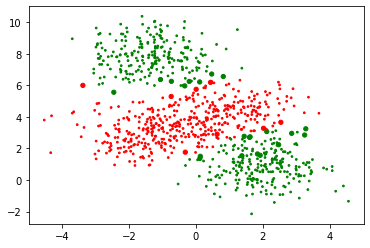

In [18]:
y_pred  = model.predict(x_train)
y_pred_binarised_val = (y_pred >= 0.5).astype("int").ravel()
accuracy_val = accuracy_score(y_pred_binarised_val, y_train)
print("Validation accuracy", round(accuracy_val, 2))
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_binarised_val, cmap=my_cmap, s=15*(np.abs(y_pred_binarised_val-y_train)+.2))
plt.show()